# GPT-human labeling comparison

## 1. Enviroment Setting

In [ ]:
import json
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Dataset Load

In [ ]:
# 1. CSV 파일 데이터 로드
file_path = '/content/drive/MyDrive/AIFFELthon/Data/Sample/Sample_감정이태깅된자유대화(성인)/utterance_json_output_inside.csv'  # 업로드된 파일 경로
data = pd.read_csv(file_path)

# 필요한 열만 추출
data = data[['FileName', 'Text', 'SpeakerEmotionTarget', 'VerifyEmotionTarget']]

<ipython-input-3-f19e87bc518e>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_data = data.groupby('FileName').apply(


In [ ]:
# 파일명 기준으로 대화 분리
def group_dialogues_by_filename(data):
    # 파일명 기준 그룹화
    data['DialogueGroup'] = data['FileName'].str.extract(r'(.+?)_\d{6}_\d{6}.wav')
    grouped_data = data.groupby('FileName').apply(
        lambda group: pd.DataFrame({
            'GroupID': [group.iloc[0]['DialogueGroup']]*len(group),
            'FileName': group['FileName'],
            'Text': group['Text'],
            'SpeakerEmotionTarget': group['SpeakerEmotionTarget'],
            'VerifyEmotionTarget': group['VerifyEmotionTarget']
        })
    ).reset_index(drop=True)
    return grouped_data

In [ ]:
# 대화 데이터 분리
grouped_data = group_dialogues_by_filename(data)

final_data = grouped_data

In [ ]:
# 결과 출력
final_data

새로운 데이터프레임:


,GroupID,FileName,Text,SpeakerEmotionTarget,VerifyEmotionTarget
0,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,안녕하세요,놀라움,놀라움
1,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,네 안녕하세요,놀라움,놀라움
2,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,식사는 하셨습니까,놀라움,놀라움
3,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,저기 밥을 먹었는지 어쨌는지 지금 모를 정도로,놀라움,놀라움
4,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,아 지칩니다,놀라움,놀라움
...,...,...,...,...,...
24033,2_1413G1A5_1415G2A5_T1_2D02T0081C000364,2_1413G1A5_1415G2A5_T1_2D02T0081C000364_005253...,그래,없음,없음
24034,2_1413G1A5_1415G2A5_T1_2D02T0081C000364,2_1413G1A5_1415G2A5_T1_2D02T0081C000364_005253...,그러니까 보기 나름인 거 하기 나름인 거야,없음,없음
24035,2_1413G1A5_1415G2A5_T1_2D02T0081C000364,2_1413G1A5_1415G2A5_T1_2D02T0081C000364_005253...,제가 끝,없음,없음
24036,2_1413G1A5_1415G2A5_T1_2D02T0081C000364,2_1413G1A5_1415G2A5_T1_2D02T0081C000364_005253...,으,없음,없음


In [ ]:
origin_json_output = final_data

In [ ]:
# 2. JSON 파일 데이터(GPT-4o output)를 데이터프레임으로 변환하기
path = '/content/drive/MyDrive/AIFFELthon/Data/Sample/인지적프롬프팅_output/GPT_api_output/11.STICC_sentences_478_conv_0-1.json'  # JSON 파일 경로 지정
with open(path, 'r', encoding='utf-8') as file:
    json_data = json.load(file)


In [ ]:
data_json = []
for item in json_data:
    flat_item = {
        'sentence': item.get('sentence'),
        'primary_emotion': item.get('result', {}).get('schema', {}).get('primary_emotion',
                             item.get('result', {}).get('primary_emotion')),
        'secondary_emotion': item.get('result', {}).get('schema', {}).get('secondary_emotion',
                             item.get('result', {}).get('secondary_emotion'))
    }
    data_json.append(flat_item)

gpt_output = pd.DataFrame(data_json)
gpt_output

,sentence,primary_emotion,secondary_emotion
0,안녕하세요,없음,없음
1,네 안녕하세요,기쁨,없음
2,식사는 하셨습니까,없음,없음
3,저기 밥을 먹었는지 어쨌는지 지금 모를 정도로,없음,없음
4,아 지칩니다,슬픔,없음
...,...,...,...
473,한 올로 뛰어올랐는데,없음,없음
474,착취할 때,없음,없음
475,엉덩이 방아를 찢는 선수도 있었고,놀라움,없음
476,어 내려오다가 눈 위를 몇 바퀴 구르면서 떨어진 선수도 있었고,놀라움,없음


## 3. Merge human-labeled data with gpt-labeled data
- filename 기준

In [ ]:
# 새로운 데이터프레임 생성
new_rows = []
for _, row in gpt_output.iterrows():
    matching_row = origin_json_output[origin_json_output['Text'] == row['sentence']]
    if not matching_row.empty:  # 일치하는 경우에만 추가
        match = matching_row.iloc[0]  # 첫 번째 매칭 행만 선택
        new_rows.append({
            'FileName': match['FileName'],
            'sentence': row['sentence'],
            'SpeakerEmotionTarget': match['SpeakerEmotionTarget'],
            'VerifyEmotionTarget': match['VerifyEmotionTarget'],
            'primary_emotion': row['primary_emotion'],
            'secondary_emotion': row['secondary_emotion']
        })

final_df = pd.DataFrame(new_rows)

# 결과 출력
print("새로운 데이터프레임:")
final_df.head()

새로운 데이터프레임:


,FileName,sentence,SpeakerEmotionTarget,VerifyEmotionTarget,primary_emotion,secondary_emotion
0,2_1379G2A5_1275G2A4_T1_2D11T0472C000488_005062...,안녕하세요,슬픔,슬픔,없음,없음
1,2_1379G2A5_1275G2A4_T1_2D11T0472C000488_005062...,네 안녕하세요,두려움,두려움,기쁨,없음
2,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,식사는 하셨습니까,놀라움,놀라움,없음,없음
3,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,저기 밥을 먹었는지 어쨌는지 지금 모를 정도로,놀라움,놀라움,없음,없음
4,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,아 지칩니다,놀라움,놀라움,슬픔,없음


In [ ]:
# origin_json_output에 새로운 열 추가 (초기값 None)
merged_output = origin_json_output.copy()
merged_output['primary_emotion'] = None
merged_output['secondary_emotion'] = None

merged_output.head()

,GroupID,FileName,Text,SpeakerEmotionTarget,VerifyEmotionTarget,primary_emotion,secondary_emotion
0,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,안녕하세요,놀라움,놀라움,None,None
1,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,네 안녕하세요,놀라움,놀라움,None,None
2,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,식사는 하셨습니까,놀라움,놀라움,None,None
3,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,저기 밥을 먹었는지 어쨌는지 지금 모를 정도로,놀라움,놀라움,None,None
4,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,아 지칩니다,놀라움,놀라움,None,None


In [ ]:
merged_output

,GroupID,FileName,Text,SpeakerEmotionTarget,VerifyEmotionTarget,primary_emotion,secondary_emotion
0,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,안녕하세요,놀라움,놀라움,없음,없음
1,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,네 안녕하세요,놀라움,놀라움,기쁨,없음
2,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,식사는 하셨습니까,놀라움,놀라움,없음,없음
3,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,저기 밥을 먹었는지 어쨌는지 지금 모를 정도로,놀라움,놀라움,없음,없음
4,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,아 지칩니다,놀라움,놀라움,슬픔,없음
...,...,...,...,...,...,...,...
24033,2_1413G1A5_1415G2A5_T1_2D02T0081C000364,2_1413G1A5_1415G2A5_T1_2D02T0081C000364_005253...,그래,없음,없음,None,None
24034,2_1413G1A5_1415G2A5_T1_2D02T0081C000364,2_1413G1A5_1415G2A5_T1_2D02T0081C000364_005253...,그러니까 보기 나름인 거 하기 나름인 거야,없음,없음,None,None
24035,2_1413G1A5_1415G2A5_T1_2D02T0081C000364,2_1413G1A5_1415G2A5_T1_2D02T0081C000364_005253...,제가 끝,없음,없음,None,None
24036,2_1413G1A5_1415G2A5_T1_2D02T0081C000364,2_1413G1A5_1415G2A5_T1_2D02T0081C000364_005253...,으,없음,없음,없음,없음


- gpt-human_align

In [ ]:
merged_output_478 = merged_output[:478].copy()

In [ ]:
merged_output_478

,GroupID,FileName,Text,SpeakerEmotionTarget,VerifyEmotionTarget,primary_emotion,secondary_emotion
0,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,안녕하세요,놀라움,놀라움,없음,없음
1,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,네 안녕하세요,놀라움,놀라움,기쁨,없음
2,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,식사는 하셨습니까,놀라움,놀라움,없음,없음
3,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,저기 밥을 먹었는지 어쨌는지 지금 모를 정도로,놀라움,놀라움,없음,없음
4,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,아 지칩니다,놀라움,놀라움,슬픔,없음
...,...,...,...,...,...,...,...
473,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,한 올로 뛰어올랐는데,놀라움,놀라움,없음,없음
474,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,착취할 때,놀라움,놀라움,없음,없음
475,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,엉덩이 방아를 찢는 선수도 있었고,놀라움,놀라움,놀라움,없음
476,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,어 내려오다가 눈 위를 몇 바퀴 구르면서 떨어진 선수도 있었고,놀라움,놀라움,놀라움,없음


In [ ]:
# 두 데이터프레임의 길이가 동일한지 확인
if len(merged_output_478) == len(gpt_output):
    # 'primary_emotion'과 'secondary_emotion' 값을 순서대로 추가
    merged_output_478['primary_emotion'] = gpt_output['primary_emotion'].values
    merged_output_478['secondary_emotion'] = gpt_output['secondary_emotion'].values
else:
    raise ValueError("merged_output과 gpt_output의 행 수가 다릅니다. 확인이 필요합니다.")


In [ ]:
merged_output_478

,GroupID,FileName,Text,SpeakerEmotionTarget,VerifyEmotionTarget,primary_emotion,secondary_emotion
0,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,안녕하세요,놀라움,놀라움,없음,없음
1,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,네 안녕하세요,놀라움,놀라움,기쁨,없음
2,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,식사는 하셨습니까,놀라움,놀라움,없음,없음
3,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,저기 밥을 먹었는지 어쨌는지 지금 모를 정도로,놀라움,놀라움,없음,없음
4,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,아 지칩니다,놀라움,놀라움,슬픔,없음
...,...,...,...,...,...,...,...
473,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,한 올로 뛰어올랐는데,놀라움,놀라움,없음,없음
474,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,착취할 때,놀라움,놀라움,없음,없음
475,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,엉덩이 방아를 찢는 선수도 있었고,놀라움,놀라움,놀라움,없음
476,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,어 내려오다가 눈 위를 몇 바퀴 구르면서 떨어진 선수도 있었고,놀라움,놀라움,놀라움,없음


In [ ]:
csv_path = '/content/drive/MyDrive/AIFFELthon/Data/Sample/인지적프롬프팅_output/GPT_api_output/GPT-human_align.csv'
merged_output_478.to_csv(csv_path, index=False)

## 4. Data Pre-processing

In [ ]:
# 빈 열 데이터가 있는 행의 개수 세기
empty_rows_count = merged_output_478.isnull().any(axis=1).sum()

9

In [ ]:
# 빈 열 데이터가 있는 행 제거
merged_output_478_cleaned = merged_output_478.dropna()

# 결과 출력
print(f"빈 데이터가 있는 행 개수: {empty_rows_count}")
print(f"전처리 후 데이터프레임 크기: {merged_output_478_cleaned.shape}")


빈 데이터가 있는 행 개수: 9
전처리 후 데이터프레임 크기: (469, 7)


In [ ]:
# 1. SpeakerEmotionTarget과 VerifyEmotionTarget의 값 비교
matching_rows = merged_output_478_cleaned[merged_output_478_cleaned['SpeakerEmotionTarget'] == merged_output_478_cleaned['VerifyEmotionTarget']]
non_matching_rows = merged_output_478_cleaned[merged_output_478_cleaned['SpeakerEmotionTarget'] != merged_output_478_cleaned['VerifyEmotionTarget']]

# 2. VerifyEmotionTarget과 primary_emotion, secondary_emotion의 일치 여부 확인 및 새로운 열 추가
matching_rows['Verify_vs_Primary'] = matching_rows['VerifyEmotionTarget'] == matching_rows['primary_emotion']
matching_rows['Verify_vs_Secondary'] = matching_rows['VerifyEmotionTarget'] == matching_rows['secondary_emotion']

# 결과 확인
matching_rows.shape, non_matching_rows.shape


((469, 9), (0, 7))

- 469개 rows 전부 matching_rows에 해당하고, non_matching_rows 데이터는 현재 샘플에서는 없다

In [ ]:
matching_rows

,GroupID,FileName,Text,SpeakerEmotionTarget,VerifyEmotionTarget,primary_emotion,secondary_emotion,Verify_vs_Primary,Verify_vs_Secondary
0,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,안녕하세요,놀라움,놀라움,없음,없음,False,False
1,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,네 안녕하세요,놀라움,놀라움,기쁨,없음,False,False
2,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,식사는 하셨습니까,놀라움,놀라움,없음,없음,False,False
3,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,저기 밥을 먹었는지 어쨌는지 지금 모를 정도로,놀라움,놀라움,없음,없음,False,False
4,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,아 지칩니다,놀라움,놀라움,슬픔,없음,False,False
...,...,...,...,...,...,...,...,...,...
473,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,한 올로 뛰어올랐는데,놀라움,놀라움,없음,없음,False,False
474,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,착취할 때,놀라움,놀라움,없음,없음,False,False
475,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,엉덩이 방아를 찢는 선수도 있었고,놀라움,놀라움,놀라움,없음,True,False
476,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,어 내려오다가 눈 위를 몇 바퀴 구르면서 떨어진 선수도 있었고,놀라움,놀라움,놀라움,없음,True,False


In [ ]:
non_matching_rows

,GroupID,FileName,Text,SpeakerEmotionTarget,VerifyEmotionTarget,primary_emotion,secondary_emotion


## 5. Compare emotion label (human-labeled data vs. LLM-labeled data)


In [ ]:
# 1. 두 컬럼 모두 True인 행
both_true = matching_rows[(matching_rows['Verify_vs_Primary']) & (matching_rows['Verify_vs_Secondary'])]
both_true['case'] = 'both_true'

# 2. 둘 중 하나만 True인 행
one_true = matching_rows[
    (matching_rows['Verify_vs_Primary']) ^ (matching_rows['Verify_vs_Secondary'])
]
one_true['case'] = 'one_true'

# 3. 둘 다 False인 행
both_false = matching_rows[
    (~matching_rows['Verify_vs_Primary']) & (~matching_rows['Verify_vs_Secondary'])
]
both_false['case'] = 'both_false'

# 세 묶음을 하나로 정렬된 데이터프레임으로 합치기
sorted_matching_rows = pd.concat([both_true, one_true, both_false])

# 결과 확인
sorted_matching_rows.reset_index(drop=True, inplace=True)
sorted_matching_rows.shape, sorted_matching_rows.head()


<ipython-input-32-bb1f168d68bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  both_true['case'] = 'both_true'
<ipython-input-32-bb1f168d68bf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_true['case'] = 'one_true'
<ipython-input-32-bb1f168d68bf>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

((469, 10),
                                    GroupID  \
 0  2_1373G2A4_1447G2A5_T1_2D07T0333C000478   
 1  2_1373G2A4_1447G2A5_T1_2D07T0333C000478   
 2  2_1373G2A4_1447G2A5_T1_2D07T0333C000478   
 3  2_1373G2A4_1447G2A5_T1_2D07T0333C000478   
 4  2_1373G2A4_1447G2A5_T1_2D07T0333C000478   
 
                                             FileName Text  \
 0  2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...    음   
 1  2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...    음   
 2  2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...    음   
 3  2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...    어   
 4  2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...    네   
 
   SpeakerEmotionTarget VerifyEmotionTarget primary_emotion secondary_emotion  \
 0                   없음                  없음              없음                없음   
 1                   없음                  없음              없음                없음   
 2                   없음                  없음              없음                없음   
 3    

In [ ]:
sorted_matching_rows

,GroupID,FileName,Text,SpeakerEmotionTarget,VerifyEmotionTarget,primary_emotion,secondary_emotion,Verify_vs_Primary,Verify_vs_Secondary,case
0,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,음,없음,없음,없음,없음,True,True,both_true
1,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,음,없음,없음,없음,없음,True,True,both_true
2,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,음,없음,없음,없음,없음,True,True,both_true
3,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,어,없음,없음,없음,없음,True,True,both_true
4,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,네,없음,없음,없음,없음,True,True,both_true
...,...,...,...,...,...,...,...,...,...,...
464,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,집중력이 흐트러지거나,놀라움,놀라움,없음,없음,False,False,both_false
465,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,도움 답기가 모잘라서,놀라움,놀라움,없음,없음,False,False,both_false
466,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,한 올로 뛰어올랐는데,놀라움,놀라움,없음,없음,False,False,both_false
467,2_1373G2A4_1447G2A5_T1_2D07T0333C000478,2_1373G2A4_1447G2A5_T1_2D07T0333C000478_005449...,착취할 때,놀라움,놀라움,없음,없음,False,False,both_false


In [ ]:
# 각 그룹의 행 개수 세기
both_true_count = both_true.shape[0]
one_true_count = one_true.shape[0]
both_false_count = both_false.shape[0]

both_true_count, one_true_count, both_false_count


(86, 31, 352)

## 6. Visualize percentage (based on Comparison of Verify_vs_Primary and Verify_vs_Secondary)

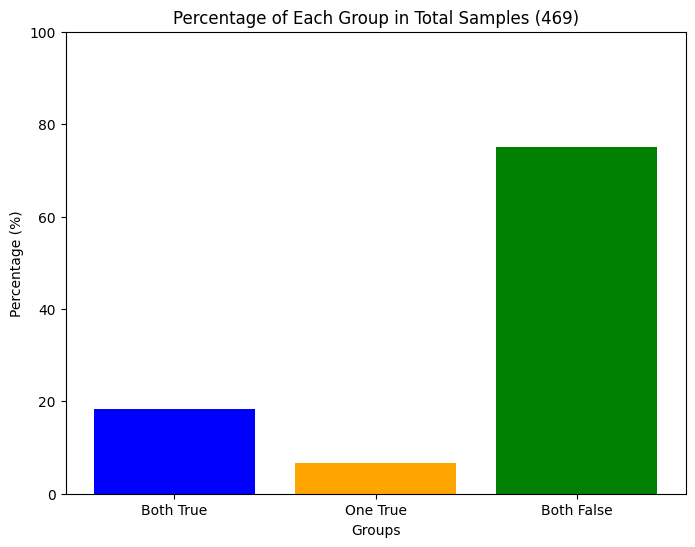

In [ ]:
import matplotlib.pyplot as plt

# 전체 샘플 수 계산
total_samples = sorted_matching_rows.shape[0]

# 각 그룹의 행 개수 및 퍼센트 계산
group_counts = [both_true_count, one_true_count, both_false_count]
group_labels = ['Both True', 'One True', 'Both False']
group_percentages = [(count / total_samples) * 100 for count in group_counts]

# 시각화
plt.figure(figsize=(8, 6))
plt.bar(group_labels, group_percentages, color=['blue', 'orange', 'green'])
plt.xlabel('Groups')
plt.ylabel('Percentage (%)')
plt.title(f'Percentage of Each Group in Total Samples ({total_samples})')
plt.ylim(0, 100)
plt.show()


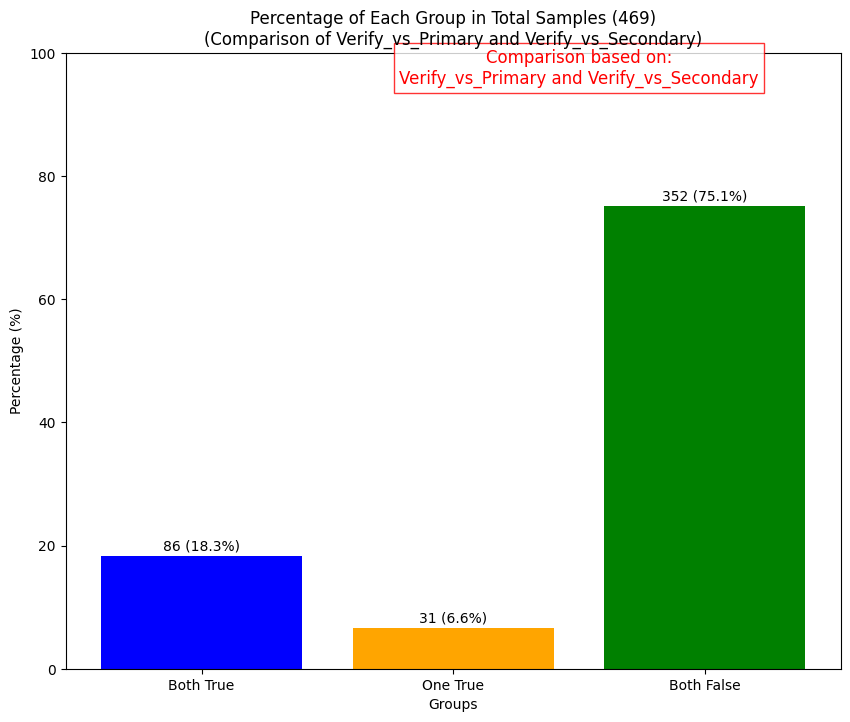

In [ ]:
# 시각화: 각 그룹의 개수와 퍼센티지 + 비교 기준 표시
plt.figure(figsize=(10, 8))
bars = plt.bar(group_labels, group_percentages, color=['blue', 'orange', 'green'])

# 각 바 위에 개수와 퍼센티지 표시
for bar, count, percentage in zip(bars, group_counts, group_percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X 좌표
        bar.get_height() + 1,  # Y 좌표 (바의 높이 위)
        f'{count} ({percentage:.1f}%)',  # 표시 텍스트
        ha='center', fontsize=10
    )

# 추가 설명 텍스트
plt.text(
    1.5, 95,  # 그래프 상단에 표시할 위치 (x, y)
    'Comparison based on:\nVerify_vs_Primary and Verify_vs_Secondary',
    ha='center', fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.8, edgecolor='red')
)

plt.xlabel('Groups')
plt.ylabel('Percentage (%)')
plt.title(f'Percentage of Each Group in Total Samples ({total_samples})\n(Comparison of Verify_vs_Primary and Verify_vs_Secondary)')
plt.ylim(0, 100)
plt.show()


In [ ]:
save_path = '/content/drive/MyDrive/AIFFELthon/Data/Sample/인지적프롬프팅_output/GPT_api_output/emotion_comparison_based_on_verify-primary-secondary.csv'

sorted_matching_rows.to_csv(save_path, index=False)

[첨부] 1개 일치 케이스 샘플 모음 

![image (23).png](<attachment:image (23).png>)

- 그 외 (유의사항 및 반복될 수 있는 GPT 출력 오류)
    - ‘자부심’ 이라는 임의의 감정 태깅을 해버린 경우 존재함 (sample 1개),
    - ‘없음’을 ‘없는’으로 잘못 출력한 경우 있음
    
        → GPT api 호출 코드 보강 할 시 데이터 검토 단계에서 반복 가능성 있는 오류이므로 유의

- ‘없음’ 이 많이 나옴, 데이터가공 및 GPT호출 코드 보강 (문장만 확인X, 맥락 반영하도록)